<a href="https://colab.research.google.com/github/LucasBezerraSantos/Alura_Machine_Learning/blob/master/Otimiza%C3%A7%C3%A3o_atrav%C3%A9s_de_hiperpar%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1 - Leitura, Transformação e Avaliação de Hiperparâmetros

### PIP Install

*A biblioteca Graphviz é uma ferramenta de visualização de gráficos e redes que permite a criação de diagramas em várias linguagens de programação, incluindo Python. Ela oferece uma série de recursos para gerar gráficos e estruturas complexas de forma visualmente atraente e fácil de entender, sendo especialmente útil em áreas como análise de dados, machine learning e visualização de algoritmos*

In [ ]:
!pip install graphviz==0.9
!pip install pydot

!apt-get install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


### Leitura de Dados

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head()


,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


Modificando a ordem dos dados para dificultar o aprendizado do modelo e testar a validação cruzada

In [ ]:
dados_azar = dados.sort_values('vendido', ascending=True)
x_azar = dados_azar[['preco', 'idade_do_modelo', 'km_por_ano']]
y_azar = dados_azar['vendido']
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


### Avaliação de Modelos

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [ ]:
SEED = 301
np.random.seed(SEED)

**Dummy**

In [ ]:
modelo = DummyClassifier()
results = cross_validate( modelo, x_azar, y_azar, cv = 10, return_train_score= False )
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print('Accuracy com dummy classifier, 10 = [%.2f, %.2f]' % ((media - 2* desvio_padrao) *100, (media + 2* desvio_padrao) *100))

Accuracy com dummy classifier, 10 = [58.00, 58.00]


**Decision Tree**

In [ ]:
modelo = DecisionTreeClassifier( max_depth=2 )
results = cross_validate( modelo, x_azar, y_azar, cv = 10, return_train_score= False )
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print('Accuracy com dummy classifier, 10 = [%.2f, %.2f]' % ((media - 2* desvio_padrao) *100, (media + 2* desvio_padrao) *100))

Accuracy com dummy classifier, 10 = [73.83, 77.73]


### Gerando dados para agrupamento

In [ ]:
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


### Função para visualização de resultados

In [ ]:
def imprime_resultados( results ):
  media = results['test_score'].mean() * 100
  desvio_padrao = results['test_score'].std() * 100
  print('Accuracy médio %.2f' % media)
  print('Intervalo de confiança [%.2f, %.2f]' % ( media - 2 * desvio_padrao, media + 2 * desvio_padrao ))

### Kfold
GroupKFold em um pipeline com StandardScaler e SVC


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

**Comentários sobre sklearn.model_selection**

A biblioteca sklearn.model_selection fornece uma variedade de ferramentas para ajudar na seleção de modelos de machine learning e na avaliação de desempenho. Algumas das principais funções e classes disponíveis nesta biblioteca são:

**train_test_split:** função para dividir um conjunto de dados em conjuntos de treinamento e teste;

**cross_val_score:** função para executar a validação cruzada de um modelo;
KFold: classe para dividir um conjunto de dados em k dobras para a validação cruzada;

**StratifiedKFold:** classe para dividir um conjunto de dados em k dobras estratificadas para a validação cruzada;

**GridSearchCV:** classe para realizar uma busca em grade para encontrar os melhores hiperparâmetros para um modelo;

**RandomizedSearchCV:** classe para realizar uma busca aleatória pelos melhores hiperparâmetros para um modelo;

**learning_curve:** função para gerar uma curva de aprendizado para um modelo;

**validation_curve:** função para gerar uma curva de validação para um modelo;

**ParameterGrid:** classe para gerar todas as combinações possíveis de um conjunto de hiperparâmetros.

**SVC**

*Realiza o pré-processamento e aplicação do modelo em grupos diferentes através de um pipeline aplicado no cross_validate*

In [ ]:
SEED = 301
np.random.seed( SEED )

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline( [ ( 'transformacao', scaler ), ( 'modelo', modelo ) ] )
cv = GroupKFold( n_splits = 10 )
results = cross_validate( pipeline, x_azar, y_azar, cv= cv, groups= dados.modelo, return_train_score=False )

imprime_resultados(results)

Accuracy médio 76.68
Intervalo de confiança [74.28, 79.08]


**Decision Tree**

In [ ]:
cv = GroupKFold(n_splits= 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate( modelo, x_azar, y_azar, cv= cv, groups= dados.modelo, return_train_score=False )
imprime_resultados(results)

Accuracy médio 75.78
Intervalo de confiança [73.67, 77.90]


### Visualização

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

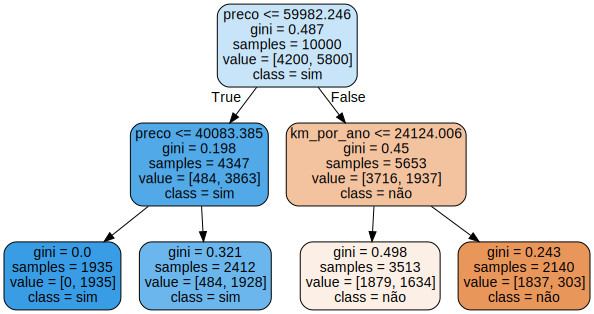

In [ ]:
modelo.fit( x_azar, y_azar )
features = x_azar.columns
dot_data = export_graphviz( modelo, out_file=None, filled=True, rounded=True,
                           class_names=["não","sim"],
                           feature_names = features)

graph = graphviz.Source(dot_data)
graph

### Avaliando Hiperparâmetros

In [ ]:
def roda_arvore_de_decisao(max_depth):
  
  #instancia o modelo
  #retorna uma lista com as métricas

  SEED = 301
  np.random.seed(SEED)
  
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, train_score, test_score]
  return tabela

In [ ]:
resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]   # aplica N max_depth e armazena em uma lista que é transformada em DataFrame
resultados = pd.DataFrame(resultados, columns= ["max_depth","train","test"])
resultados.head()

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


### Visualização

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

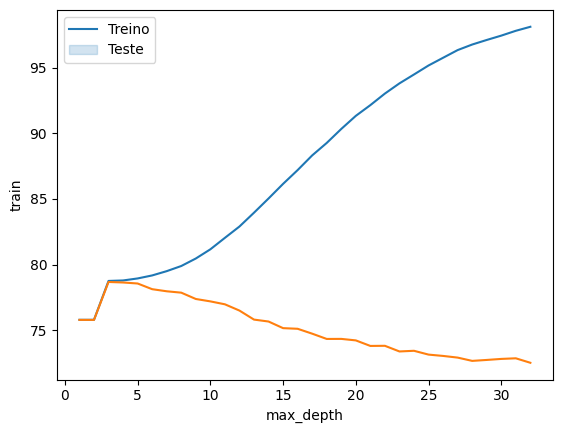

In [ ]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

## Etapa 2 - Aprofundando em Avaliação de Hiperparâmetros

**Avaliando dois Hiperparâmetros**

### Atualização de Função

In [ ]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  
  #instancia o modelo
  #retorna uma lista com as métricas

  SEED = 301
  np.random.seed(SEED)
  
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier( max_depth=max_depth, min_samples_leaf= min_samples_leaf )
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

**Comentários sobre min_samples_leaf**

O parâmetro min_samples_leaf é uma opção para ajustar a complexidade da árvore de decisão no modelo de classificação DecisionTree do scikit-learn. Ele define o número mínimo de amostras (ou observações) exigidas em uma folha da árvore. Se a divisão de um nó resultar em uma folha com menos amostras do que min_samples_leaf, a árvore de decisão não será construída mais a partir desse nó e o nó será marcado como uma folha.

Definir um valor maior para min_samples_leaf pode ajudar a evitar o overfitting (sobreajuste) da árvore, tornando-a menos complexa. Por outro lado, definir um valor muito alto pode tornar a árvore muito simples, o que pode resultar em subajuste (underfitting) e diminuir a precisão das previsões. Portanto, é importante encontrar um equilíbrio adequado ao ajustar o valor de min_samples_leaf.

### Teste 1

In [ ]:
lista = [ ]
for max_depth in range(1, 8):
  for samples_leaf in [14, 33, 45, 72]:
    tabela = roda_arvore_de_decisao(max_depth, samples_leaf)
    lista.append( tabela )
    
resultados = pd.DataFrame(lista, columns= ["max_depth", 'min_samples_leaf', "train","test"])
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,train,test
14,4,45,78.750993,78.672633
13,4,33,78.750993,78.672633
15,4,72,78.750993,78.672633
8,3,14,78.750993,78.672633
9,3,33,78.750993,78.672633


<ipython-input-21-321c63a56f55>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(resultados.corr(), dtype=np.bool)


<Axes: >

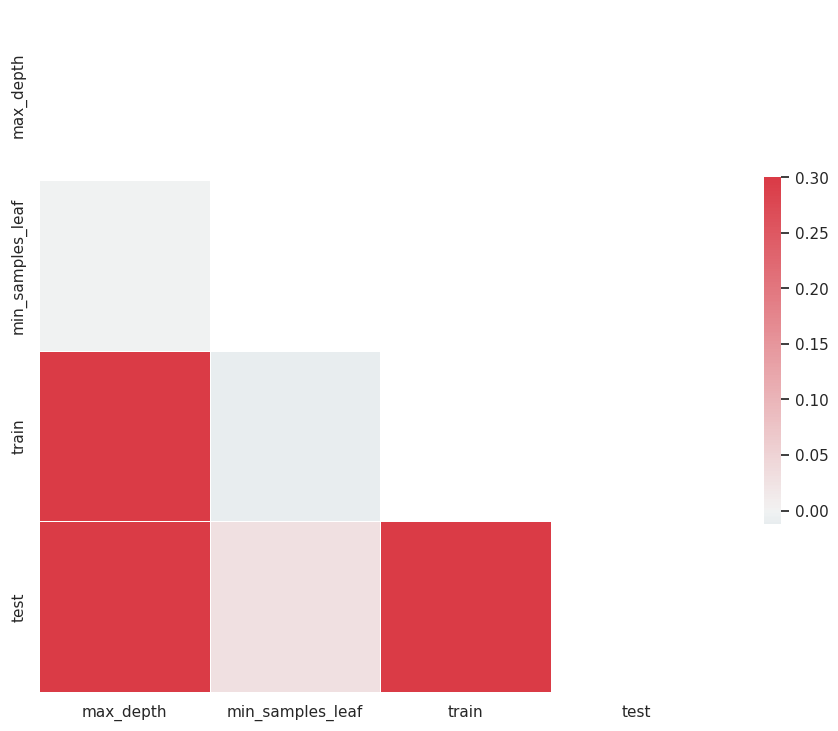

In [ ]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(resultados.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(resultados.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Teste 2

In [ ]:
lista = [ ]
for max_depth in range(1, 8):
  for samples_leaf in [50, 200, 400, 560]:
    tabela = roda_arvore_de_decisao(max_depth, samples_leaf)
    lista.append( tabela )
    
resultados = pd.DataFrame(lista, columns= ["max_depth", 'min_samples_leaf', "train","test"])
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,train,test
8,3,50,78.750993,78.672633
13,4,200,78.750993,78.672633
12,4,50,78.750993,78.672633
9,3,200,78.750993,78.672633
17,5,200,78.765499,78.441275


Visualização de Correlação

<ipython-input-23-321c63a56f55>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(resultados.corr(), dtype=np.bool)


<Axes: >

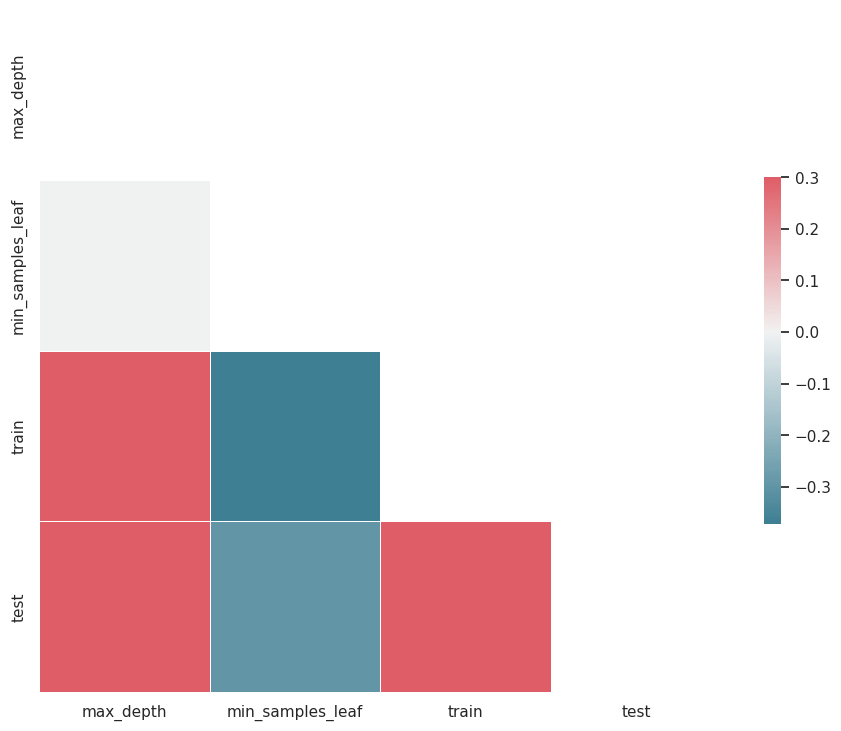

In [ ]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(resultados.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(resultados.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Teste 3

**Avaliando três Hiperparâmetros**

### Função

In [ ]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  
  #instancia o modelo
  #retorna uma lista com as métricas

  SEED = 301
  np.random.seed(SEED)
  
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier( max_depth=max_depth, min_samples_leaf= min_samples_leaf, min_samples_split= min_samples_split )
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score]
  return tabela

### Aplicação

In [ ]:
lista = [ ]
for max_depth in range(1, 8):
  for samples_leaf in [50, 200, 400, 560]:
    for samples_split in [5, 10, 40, 72]:
      tabela = roda_arvore_de_decisao(max_depth, samples_leaf, samples_split)
      lista.append( tabela )
    
resultados = pd.DataFrame(lista, columns= [ "max_depth", 'min_samples_leaf', 'samples_split', "train", "test" ])
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,samples_split,train,test
35,3,50,72,78.750993,78.672633
32,3,50,5,78.750993,78.672633
34,3,50,40,78.750993,78.672633
36,3,200,5,78.750993,78.672633
37,3,200,10,78.750993,78.672633


<ipython-input-26-321c63a56f55>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(resultados.corr(), dtype=np.bool)


<Axes: >

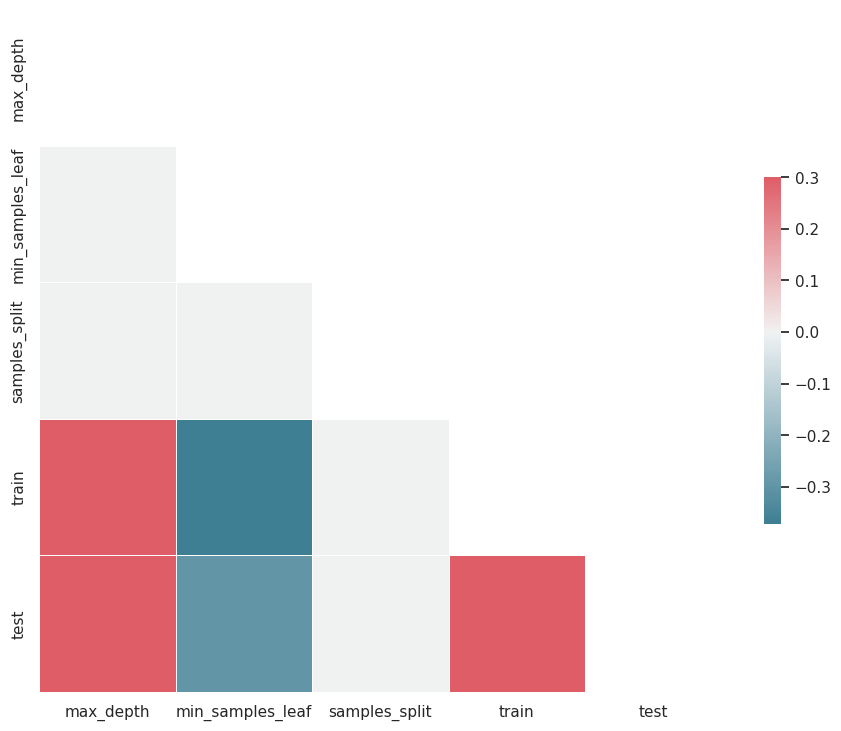

In [ ]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(resultados.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(resultados.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Etapa 3 - GridSearchCV

`Os principais hiperparâmetros do GridSearchCV do sklearn são:`

**estimator:** o estimador (modelo) a ser utilizado;

**param_grid:** um dicionário com os parâmetros que devem ser testados durante a busca;

**scoring:** a métrica de avaliação a ser utilizada para selecionar o melhor modelo;

**cv:** estratégia de validação cruzada a ser utilizada;

**n_jobs:** o número de processadores a serem usados durante o ajuste de modelo (para acelerar o processo);

**verbose:** o nível de detalhe das mensagens de progresso.

Esses são os parâmetros mais comuns, mas existem outros que podem ser utilizados para personalizar ainda mais a busca.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012602,0.001796,0.002767,0.000478,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.011622,0.000323,0.002639,0.000286,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.012425,0.001113,0.003010,0.000642,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.012086,0.000992,0.002794,0.000775,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.011988,0.000813,0.002815,0.000503,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [ ]:
print(busca.best_params_)
print('Resultado %.2f%%' %(busca.best_score_ * 100))

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
Resultado 78.67%


In [ ]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

**IMPORTANTE**! 

Evite essa abordagem, pois estará sendo otimista. O correto é fazer outro Cross Validate

In [ ]:
predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


## Etapa 4 - GridSearchCV | Selecionando o melhor modelo

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
SEED=301
np.random.seed(SEED)

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011533,0.001237,0.002952,0.000538,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.012065,0.001352,0.003173,0.000698,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.011314,0.000900,0.002719,0.000325,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.010240,0.000110,0.002407,0.000103,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.010308,0.000202,0.002507,0.000060,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


**Separa e embaralha os dados para medir a capacidade do algoritmo predizer as classes corretas**

In [ ]:
Scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
Scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [ ]:
media = Scores.mean() * 100
desvio = Scores.std() * 100

print("Accuracy médio %.2f" % media)
print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

Accuracy médio 78.67
Intervalo [76.80, 80.54]


In [ ]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


### Visualização

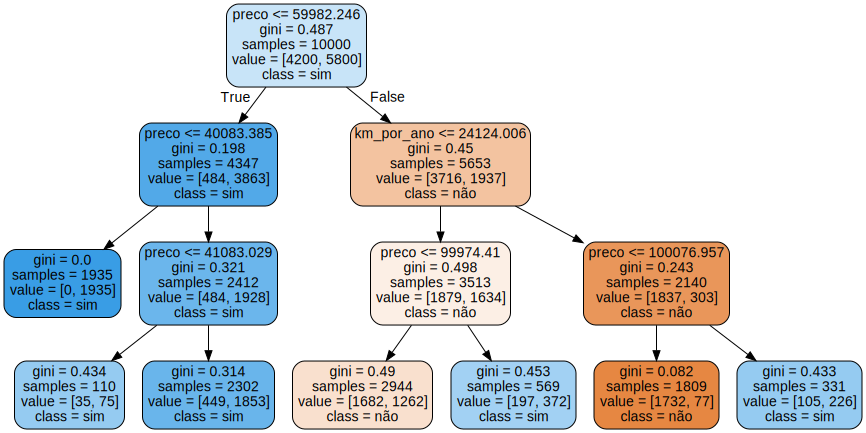

In [ ]:
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

## Etapa 5 - RandomizedSearchCV

O RandomizedSearchCV é uma técnica de busca de hiperparâmetros em modelos de machine learning que difere do GridSearchCV, pois em vez de testar todas as combinações possíveis de hiperparâmetros, ele define uma distribuição para cada hiperparâmetro e seleciona um número fixo de combinações aleatórias para avaliação. Isso pode ser mais eficiente em termos de tempo de processamento do que o GridSearchCV em casos onde o número de combinações possíveis de hiperparâmetros é muito grande.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
SEED=301
np.random.seed(SEED)

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros, n_iter=10,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030464,0.016110,0.004810,0.003545,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.7755,0.7955,0.7895,0.7855,0.7740,0.7840,0.008210,8
1,0.010109,0.000118,0.002496,0.000524,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7755,0.8030,0.7895,0.7855,0.7815,0.7870,0.009241,1
2,0.011630,0.001787,0.002980,0.000718,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7755,0.8030,0.7895,0.7855,0.7815,0.7870,0.009241,1
3,0.018138,0.001836,0.003053,0.000306,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.7755,0.7955,0.7895,0.7855,0.7755,0.7843,0.007859,4
4,0.017351,0.000905,0.003107,0.000431,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7755,0.7955,0.7895,0.7855,0.7755,0.7843,0.007859,4


In [ ]:
Scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
Scores

array([0.7745, 0.782 , 0.798 , 0.783 , 0.798 ])

In [ ]:
media = Scores.mean() * 100
desvio = Scores.std() * 100

print("Accuracy médio %.2f" % media)
print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

Accuracy médio 78.71
Intervalo [76.84, 80.58]


In [ ]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)


## Etapa 6 - RandomizedSearchCV Customização aleatória

In [ ]:
from scipy.stats import randint

In [ ]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 16, 28],
    "min_samples_split" : randint(1, 30),
    "min_samples_leaf" : randint(1, 30),
    "criterion" : ["gini", "entropy"]  }

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros, n_iter=10,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013849,0.000993,0.002724,0.000367,entropy,3,8,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7835,0.7860,0.7940,0.7885,0.7830,0.7870,0.004012,1
1,0.024262,0.001308,0.002602,0.000117,gini,16,26,16,"{'criterion': 'gini', 'max_depth': 16, 'min_sa...",0.7715,0.7660,0.7635,0.7620,0.7665,0.7659,0.003247,8
2,0.024507,0.001337,0.002681,0.000311,gini,28,29,17,"{'criterion': 'gini', 'max_depth': 28, 'min_sa...",0.7665,0.7725,0.7690,0.7645,0.7590,0.7663,0.004523,7


In [ ]:
Scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
media = Scores.mean() * 100
desvio = Scores.std() * 100

print("Accuracy médio %.2f" % media)
print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

Accuracy médio 78.70
Intervalo [76.81, 80.59]


In [ ]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=8,
                       min_samples_split=5)


### Visualização

In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f | Desvio Padrão (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 | Desvio Padrão (0.008) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 5}
0.787 | Desvio Padrão (0.008) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 15}
0.787 | Desvio Padrão (0.008) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 17}
0.787 | Desvio Padrão (0.008) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 4}
0.784 | Desvio Padrão (0.009) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 9}
0.766 | Desvio Padrão (0.008) {'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 25, 'min_samples_split': 27}
0.766 | Desvio Padrão (0.009) {'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 29, 'min_samples_split': 17}
0.766 | Desvio Padrão (0.006) {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 26, 'min_samples_split': 16}
0.762 | Desvio Padrão (0.018) {'criterion': 'gini', 'max_dept

## Etapa 7 - Aplicação para quando não puder usar Cross Validate

Separação

In [ ]:
# 0.6 treino     => treino
# 0.2 teste      => dev teste
# 0.2 validacao  => validacao

from sklearn.model_selection import train_test_split

SEED=301
np.random.seed(SEED)

x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size=0.2, shuffle=True, stratify=y_azar)
print(x_treino_teste.shape)
print(x_validacao.shape)
print(y_treino_teste.shape)
print(y_validacao.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


Definindo espaço de parâmetros

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

In [ ]:
espaco_de_parametros = {
    "n_estimators" :randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "bootstrap" : [True, False],
    "criterion" : ["gini", "entropy"]
}

split = StratifiedShuffleSplit(n_splits= 1, test_size = 0.25)

busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 5,
                    cv = split)
busca.fit(x_treino_teste, y_treino_teste)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.140245,0.0,0.010923,0.0,True,gini,5,89,58,24,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7885,0.7885,0.0,3
1,0.138704,0.0,0.010422,0.0,False,entropy,3,71,55,27,"{'bootstrap': False, 'criterion': 'entropy', '...",0.7920,0.7920,0.0,1
2,0.099013,0.0,0.008646,0.0,True,entropy,3,33,99,21,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7910,0.7910,0.0,2


In [ ]:
scores = cross_val_score(busca, x_validacao, y_validacao, cv = split)
print(scores[:]*100, '%')

[78.2] %
